In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import requests
from io import StringIO
from datetime import timedelta, datetime
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.font_manager as fm
from matplotlib.colors import LinearSegmentedColormap
from functions_visualization import *
font_path = "font-folder/Roboto-Regular.ttf"
font_path_bold = "font-folder/Roboto-Bold.ttf"
font_prop = fm.FontProperties(fname=font_path, size=20)
font_prop_legend = fm.FontProperties(fname=font_path, size=16)
font_prop_title = fm.FontProperties(fname=font_path_bold, size=26)
import matplotlib as mpl
mpl.rcParams['font.family'] = font_prop.get_name()
import warnings
warnings.filterwarnings('ignore')

In [12]:
df_wis = pd.read_csv("../output_data/performance_adaptive_ensemble/wis_adaptive_ensemble2_wmape.csv")
df_mae = pd.read_csv("../output_data/performance_adaptive_ensemble/mae_adaptive_ensemble2_wmape.csv")
df_surv = pd.read_csv("../../../input_data/target-hospital-admissions_2024-04-27.csv")
df_locations = pd.read_csv("../../../input_data/locations.csv")
df_locations.rename(columns = {'location': 'state'}, inplace = True)
# make sure both state columns are in the string format
df_locations['state'] = df_locations['state'].astype(str)
df_wis['state'] = df_wis['state'].astype(str)
df_mae['state'] = df_mae['state'].astype(str)

In [13]:
# add location name by considering abbreviation column in df_locations dataset which matches with the state column in df_wis dataset
df_wis = df_wis.merge(df_locations[['state', 'abbreviation']], how='left', left_on='state', right_on='state')
df_mae = df_mae.merge(df_locations[['state', 'abbreviation']], how='left', left_on='state', right_on='state')


In [20]:
k = 25
df_wis_k, ratios_by_state_wis, medians_wis, sorted_states_wis, ordered_ratios_wis = get_wis_k_info(df_wis, k)
df_mae_k, ratios_by_state_mae, medians_mae, sorted_states_mae, ordered_ratios_mae = get_mae_k_info(df_mae, k)

cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#1d4f60', '#67978c', '#97c0a3', '#c4e6c3'])
norm_wis, colors_wis = get_colors_wis(medians_wis, sorted_states_wis, cmap)
norm_mae, colors_mae = get_colors_mae(medians_mae, sorted_states_mae, cmap)


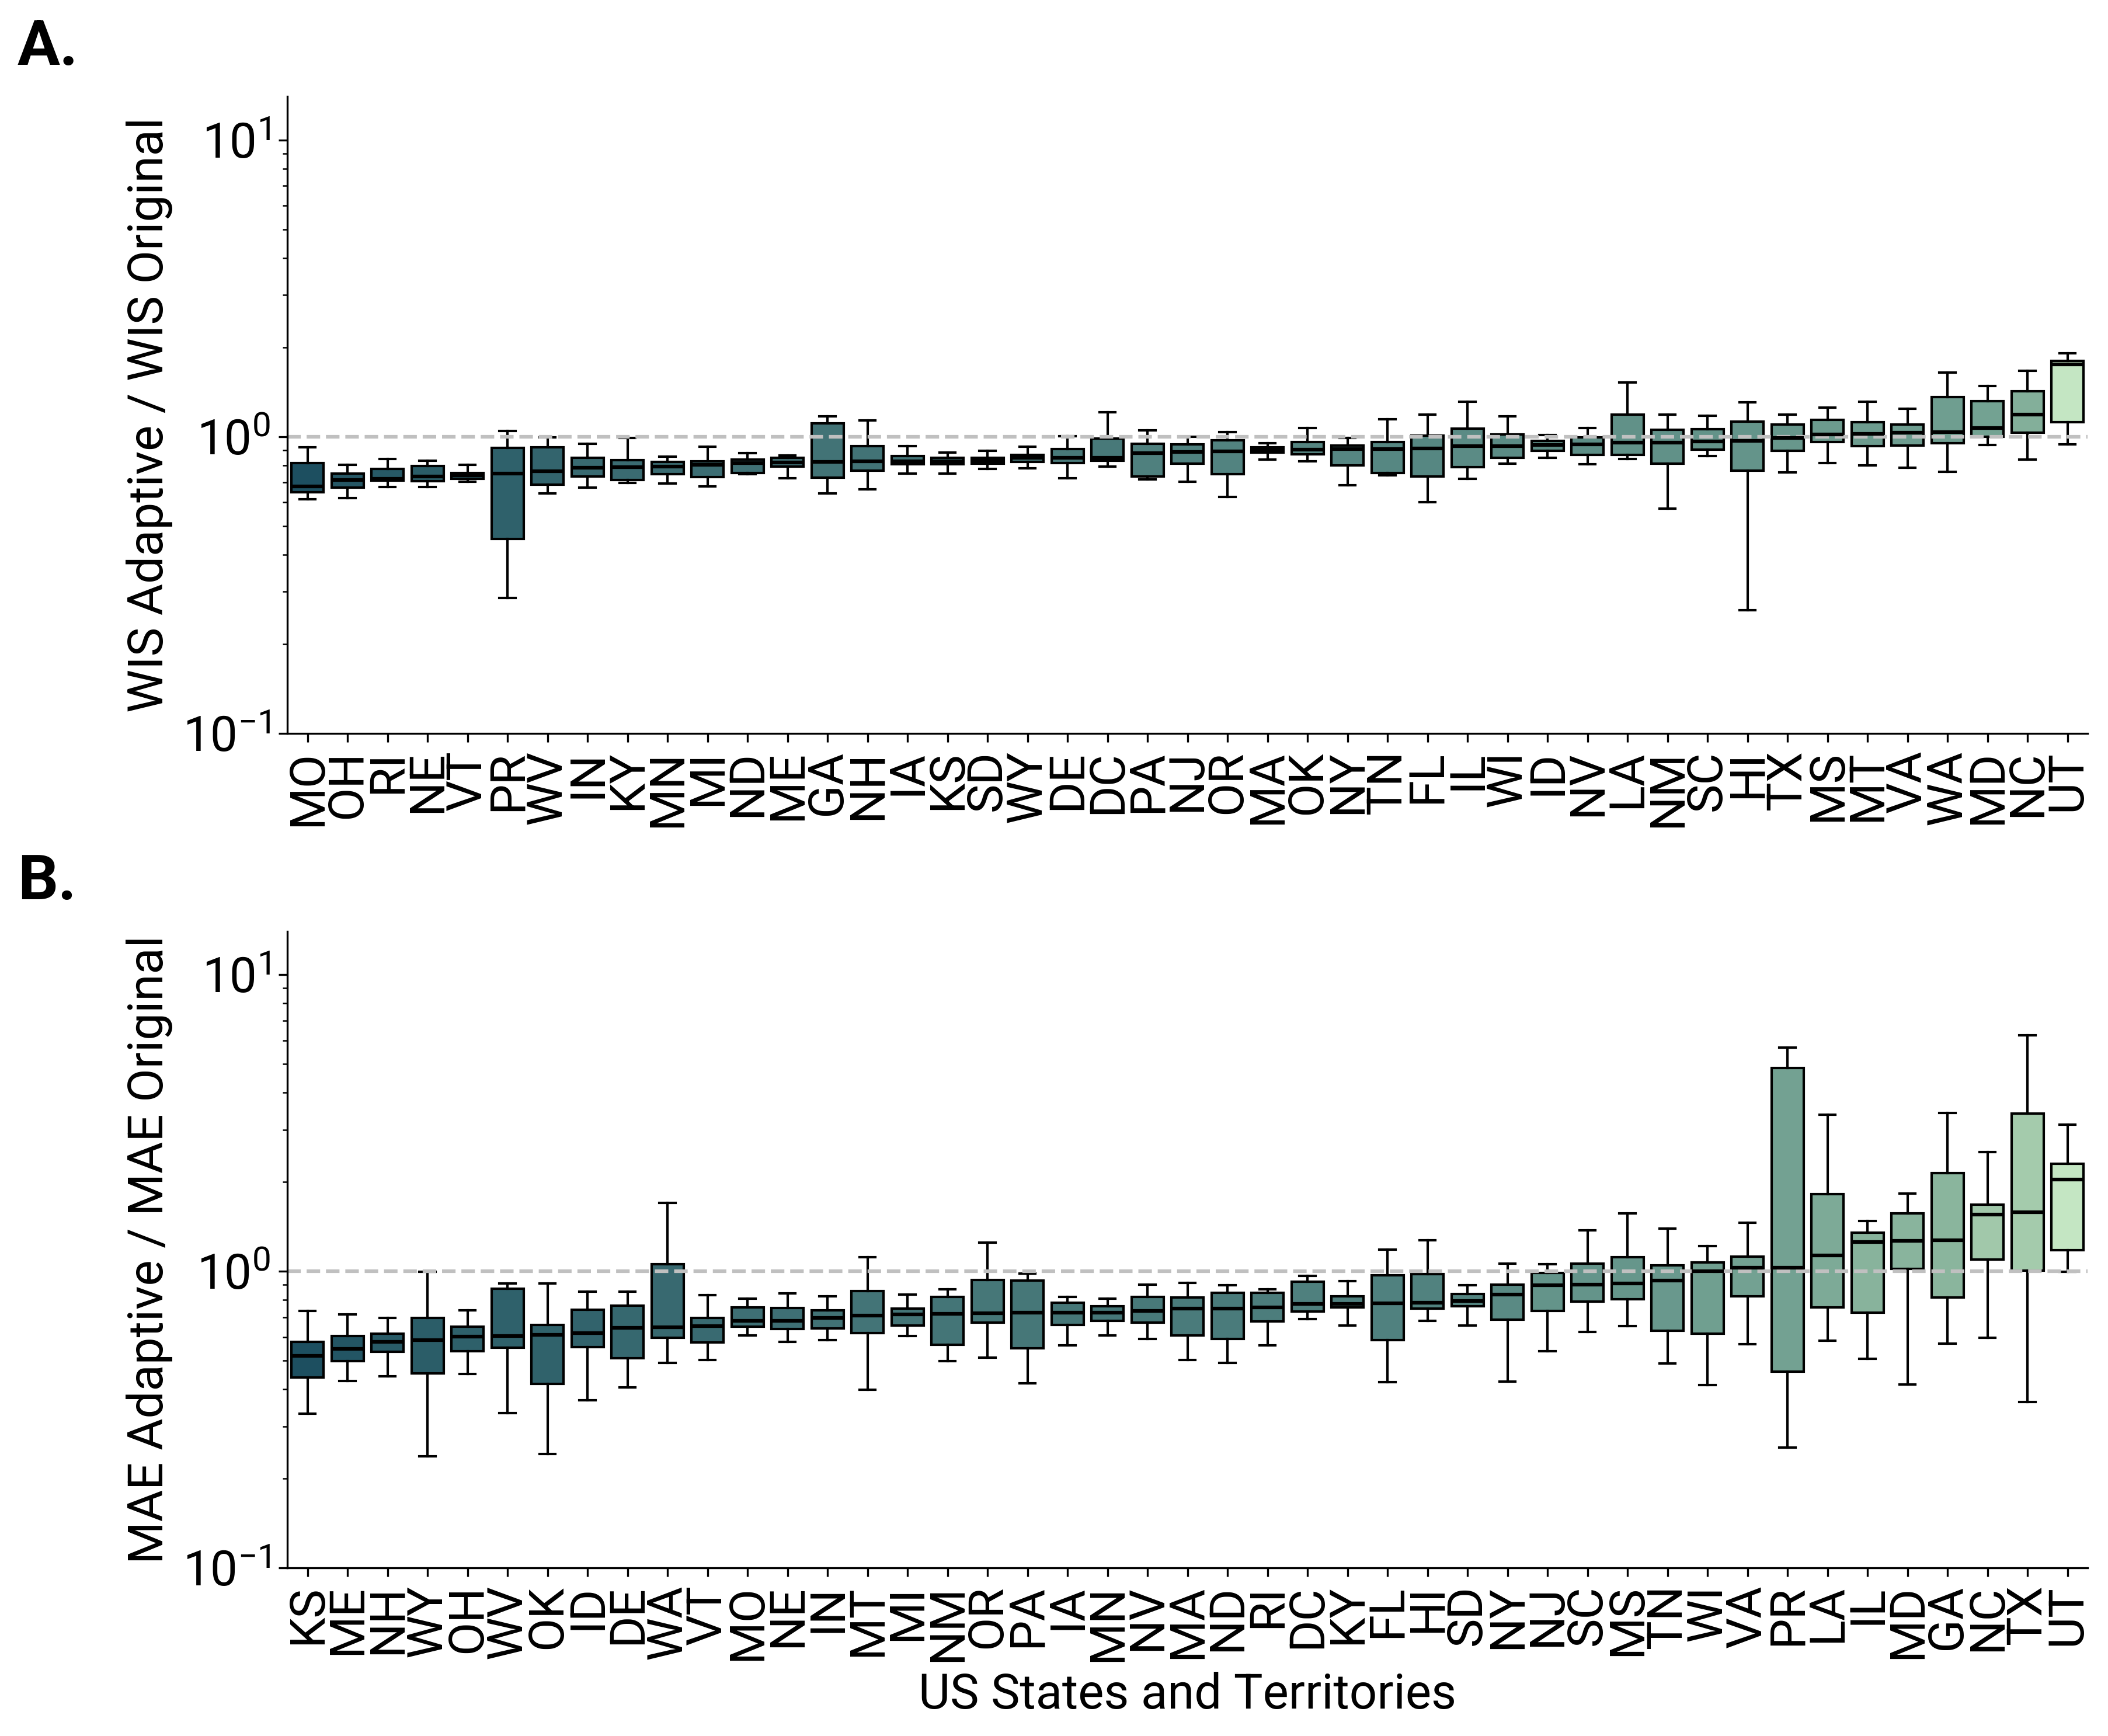

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), dpi=300)

### PLOT A: WIS Adaptive / WIS Original ###
box_wis = axes[0].boxplot(
    ordered_ratios_wis, labels=sorted_states_wis, patch_artist=True, widths=0.8, showfliers=False,
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(edgecolor='black', linewidth=1.0),
    whiskerprops=dict(color='black', linewidth=1.0),
    capprops=dict(color='black', linewidth=1.0),
)

for patch, color in zip(box_wis['boxes'], colors_wis):
    patch.set_facecolor(color)

axes[0].axhline(y=1, color='silver', linestyle='--')
axes[0].set_ylabel("WIS Adaptive / WIS Original", fontproperties=font_prop)
axes[0].text(-0.15, 1.05, 'A.', transform=axes[0].transAxes, fontproperties=font_prop_title)
axes[0].set_yscale('log')
axes[0].set_ylim(0.1, 14)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].tick_params(axis='x', rotation=90)

### PLOT B: MAE Adaptive / MAE Original ###
box_mae = axes[1].boxplot(
    ordered_ratios_mae, labels=sorted_states_mae, patch_artist=True, widths=0.8, showfliers=False,
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(edgecolor='black', linewidth=1.0),
    whiskerprops=dict(color='black', linewidth=1.0),
    capprops=dict(color='black', linewidth=1.0),
)

for patch, color in zip(box_mae['boxes'], colors_mae):
    patch.set_facecolor(color)

axes[1].axhline(y=1, color='silver', linestyle='--')
axes[1].set_xlabel("US States and Territories", fontproperties=font_prop)
axes[1].set_ylabel("MAE Adaptive / MAE Original", fontproperties=font_prop)
axes[1].text(-0.15, 1.05, 'B.', transform=axes[1].transAxes, fontproperties=font_prop_title)
axes[1].set_yscale('log')
axes[1].set_ylim(0.1, 14)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(axis='x', rotation=90)

# Apply custom font to tick labels
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop)

plt.tight_layout()
plt.savefig("../figures/wis_mae_states_k25.png", dpi=300)



In [22]:
k = 50
df_wis_k, ratios_by_state_wis, medians_wis, sorted_states_wis, ordered_ratios_wis = get_wis_k_info(df_wis, k)
df_mae_k, ratios_by_state_mae, medians_mae, sorted_states_mae, ordered_ratios_mae = get_mae_k_info(df_mae, k)

cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#1d4f60', '#67978c', '#97c0a3', '#c4e6c3'])
norm_wis, colors_wis = get_colors_wis(medians_wis, sorted_states_wis, cmap)
norm_mae, colors_mae = get_colors_mae(medians_mae, sorted_states_mae, cmap)


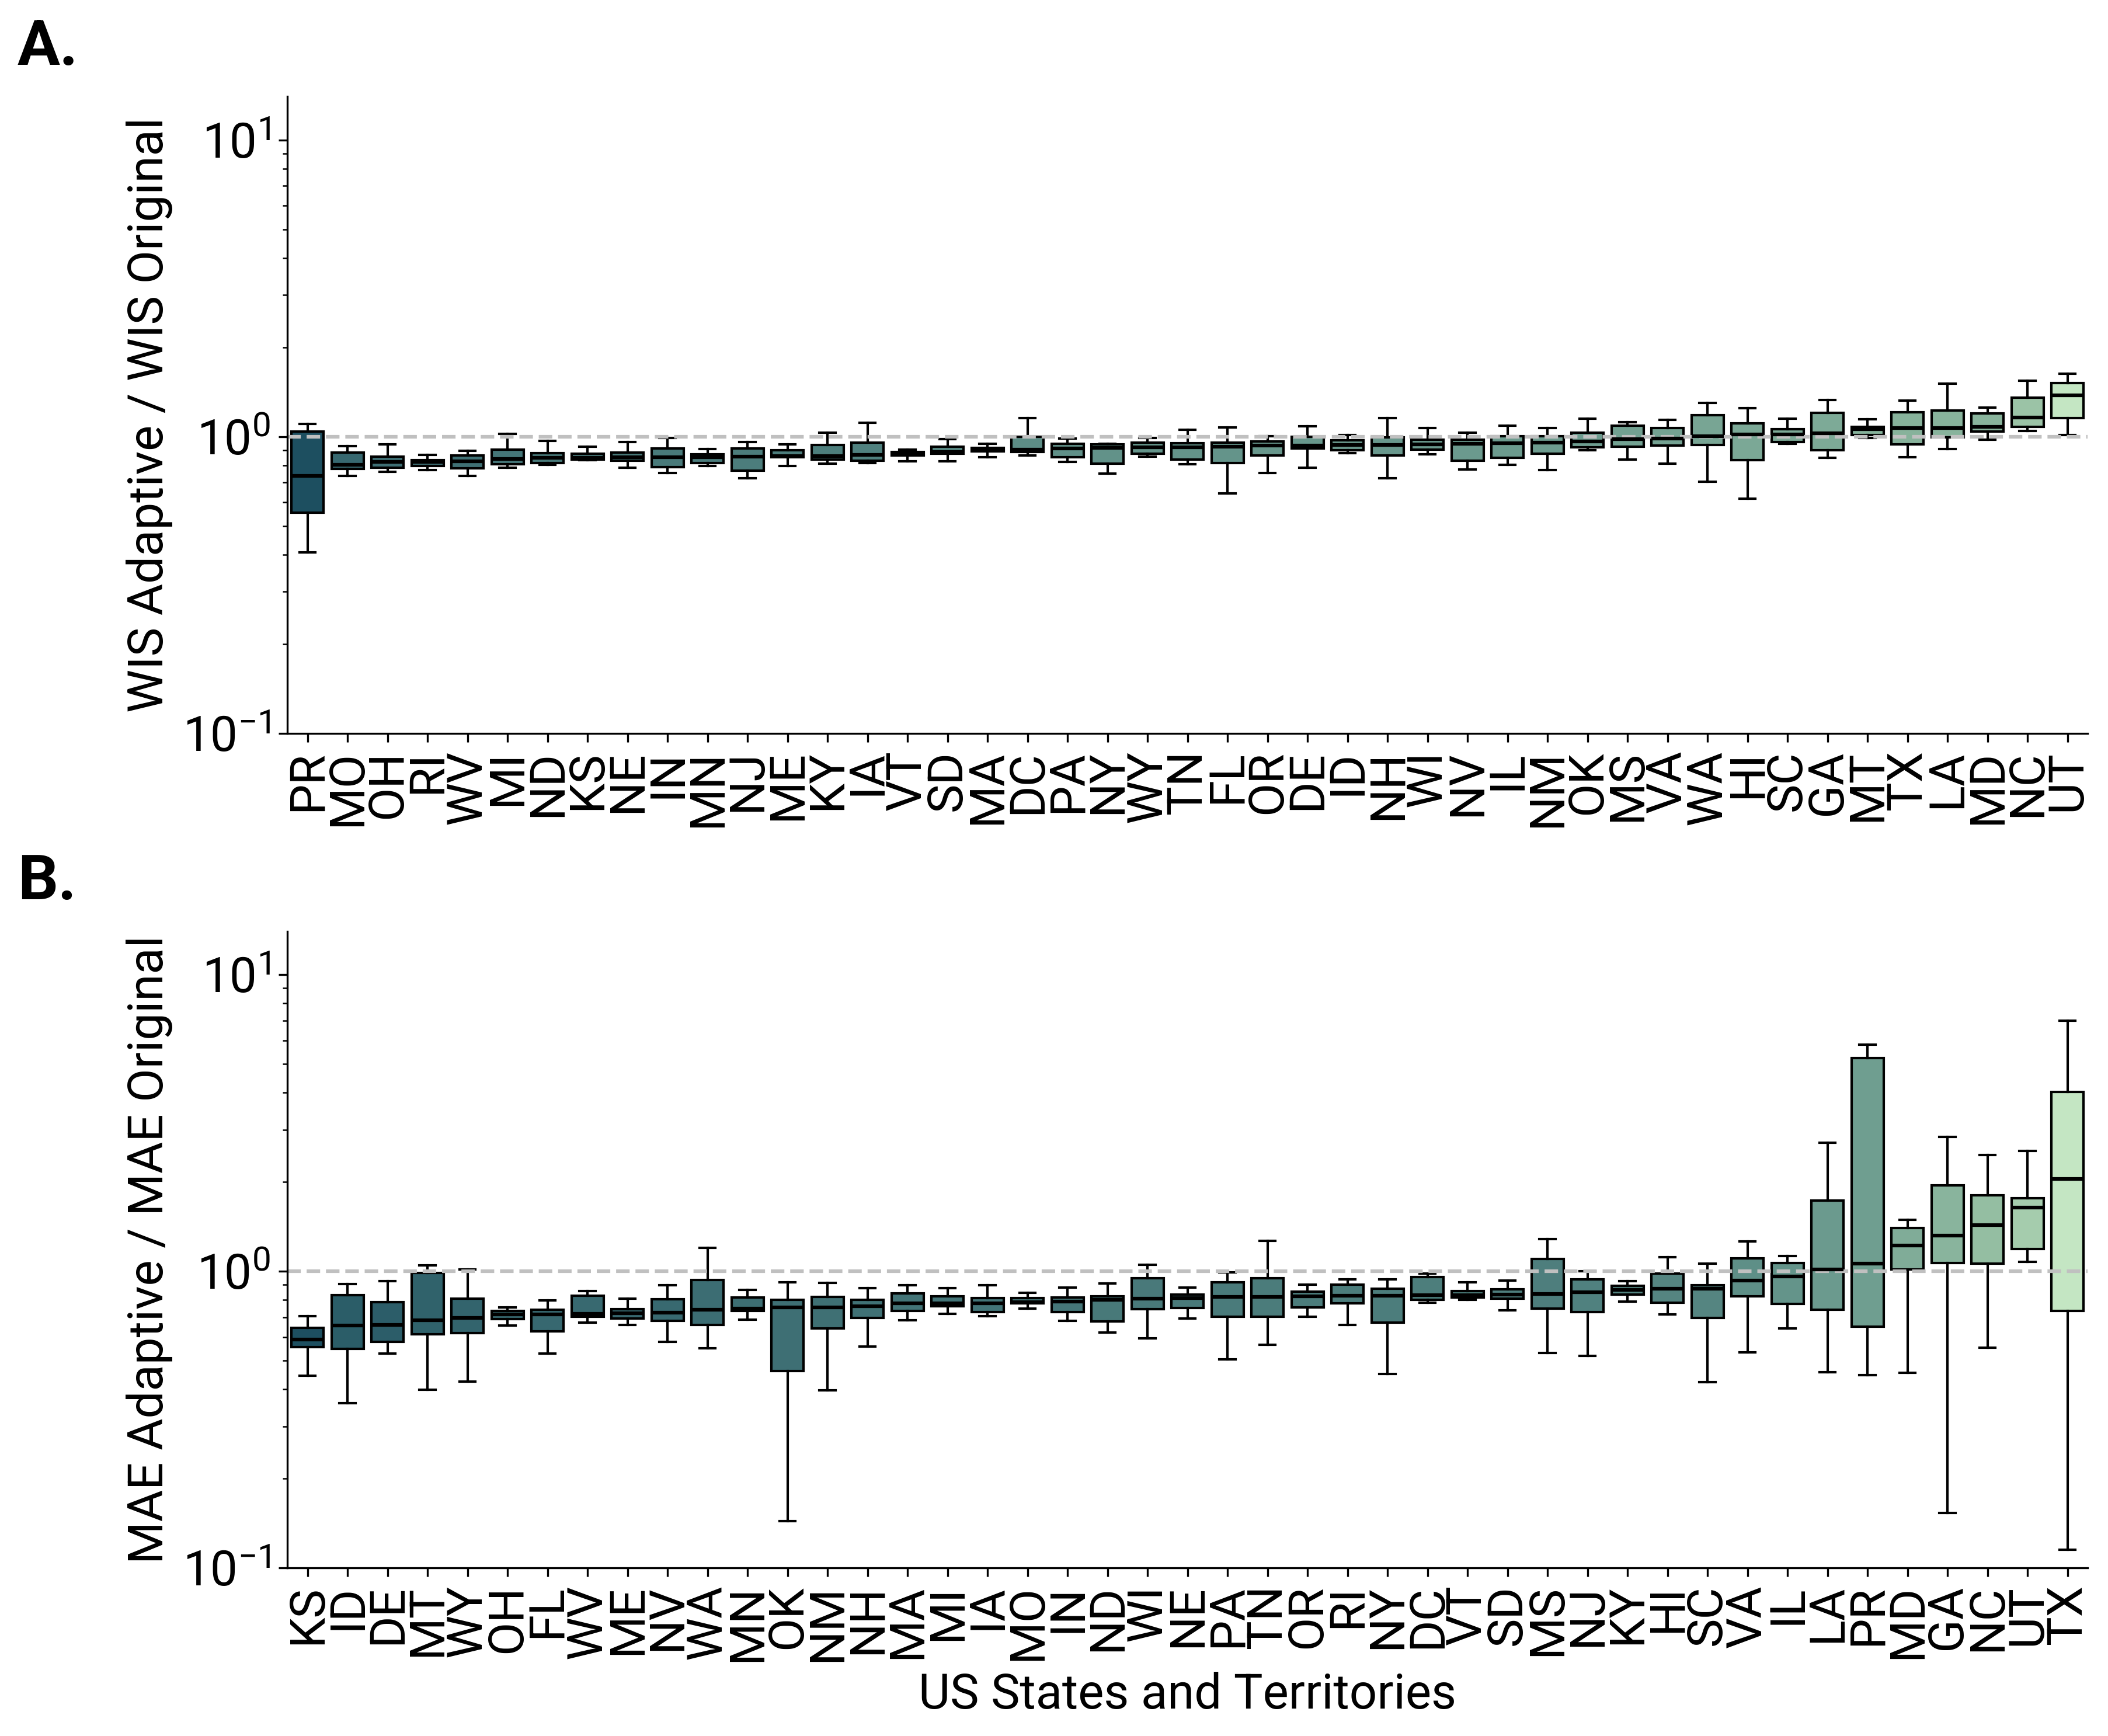

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), dpi=300)

### PLOT A: WIS Adaptive / WIS Original ###
box_wis = axes[0].boxplot(
    ordered_ratios_wis, labels=sorted_states_wis, patch_artist=True, widths=0.8, showfliers=False,
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(edgecolor='black', linewidth=1.0),
    whiskerprops=dict(color='black', linewidth=1.0),
    capprops=dict(color='black', linewidth=1.0),
)

for patch, color in zip(box_wis['boxes'], colors_wis):
    patch.set_facecolor(color)

axes[0].axhline(y=1, color='silver', linestyle='--')
axes[0].set_ylabel("WIS Adaptive / WIS Original", fontproperties=font_prop)
axes[0].text(-0.15, 1.05, 'A.', transform=axes[0].transAxes, fontproperties=font_prop_title)
axes[0].set_yscale('log')
axes[0].set_ylim(0.1, 14)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].tick_params(axis='x', rotation=90)

### PLOT B: MAE Adaptive / MAE Original ###
box_mae = axes[1].boxplot(
    ordered_ratios_mae, labels=sorted_states_mae, patch_artist=True, widths=0.8, showfliers=False,
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(edgecolor='black', linewidth=1.0),
    whiskerprops=dict(color='black', linewidth=1.0),
    capprops=dict(color='black', linewidth=1.0),
)

for patch, color in zip(box_mae['boxes'], colors_mae):
    patch.set_facecolor(color)

axes[1].axhline(y=1, color='silver', linestyle='--')
axes[1].set_xlabel("US States and Territories", fontproperties=font_prop)
axes[1].set_ylabel("MAE Adaptive / MAE Original", fontproperties=font_prop)
axes[1].text(-0.15, 1.05, 'B.', transform=axes[1].transAxes, fontproperties=font_prop_title)
axes[1].set_yscale('log')
axes[1].set_ylim(0.1, 14)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(axis='x', rotation=90)

# Apply custom font to tick labels
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop)

plt.tight_layout()
plt.savefig("../figures/wis_mae_states_k50.png", dpi=300)



In [24]:
k = 15
df_wis_k, ratios_by_state_wis, medians_wis, sorted_states_wis, ordered_ratios_wis = get_wis_k_info(df_wis, k)
df_mae_k, ratios_by_state_mae, medians_mae, sorted_states_mae, ordered_ratios_mae = get_mae_k_info(df_mae, k)

cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#1d4f60', '#67978c', '#97c0a3', '#c4e6c3'])
norm_wis, colors_wis = get_colors_wis(medians_wis, sorted_states_wis, cmap)
norm_mae, colors_mae = get_colors_mae(medians_mae, sorted_states_mae, cmap)



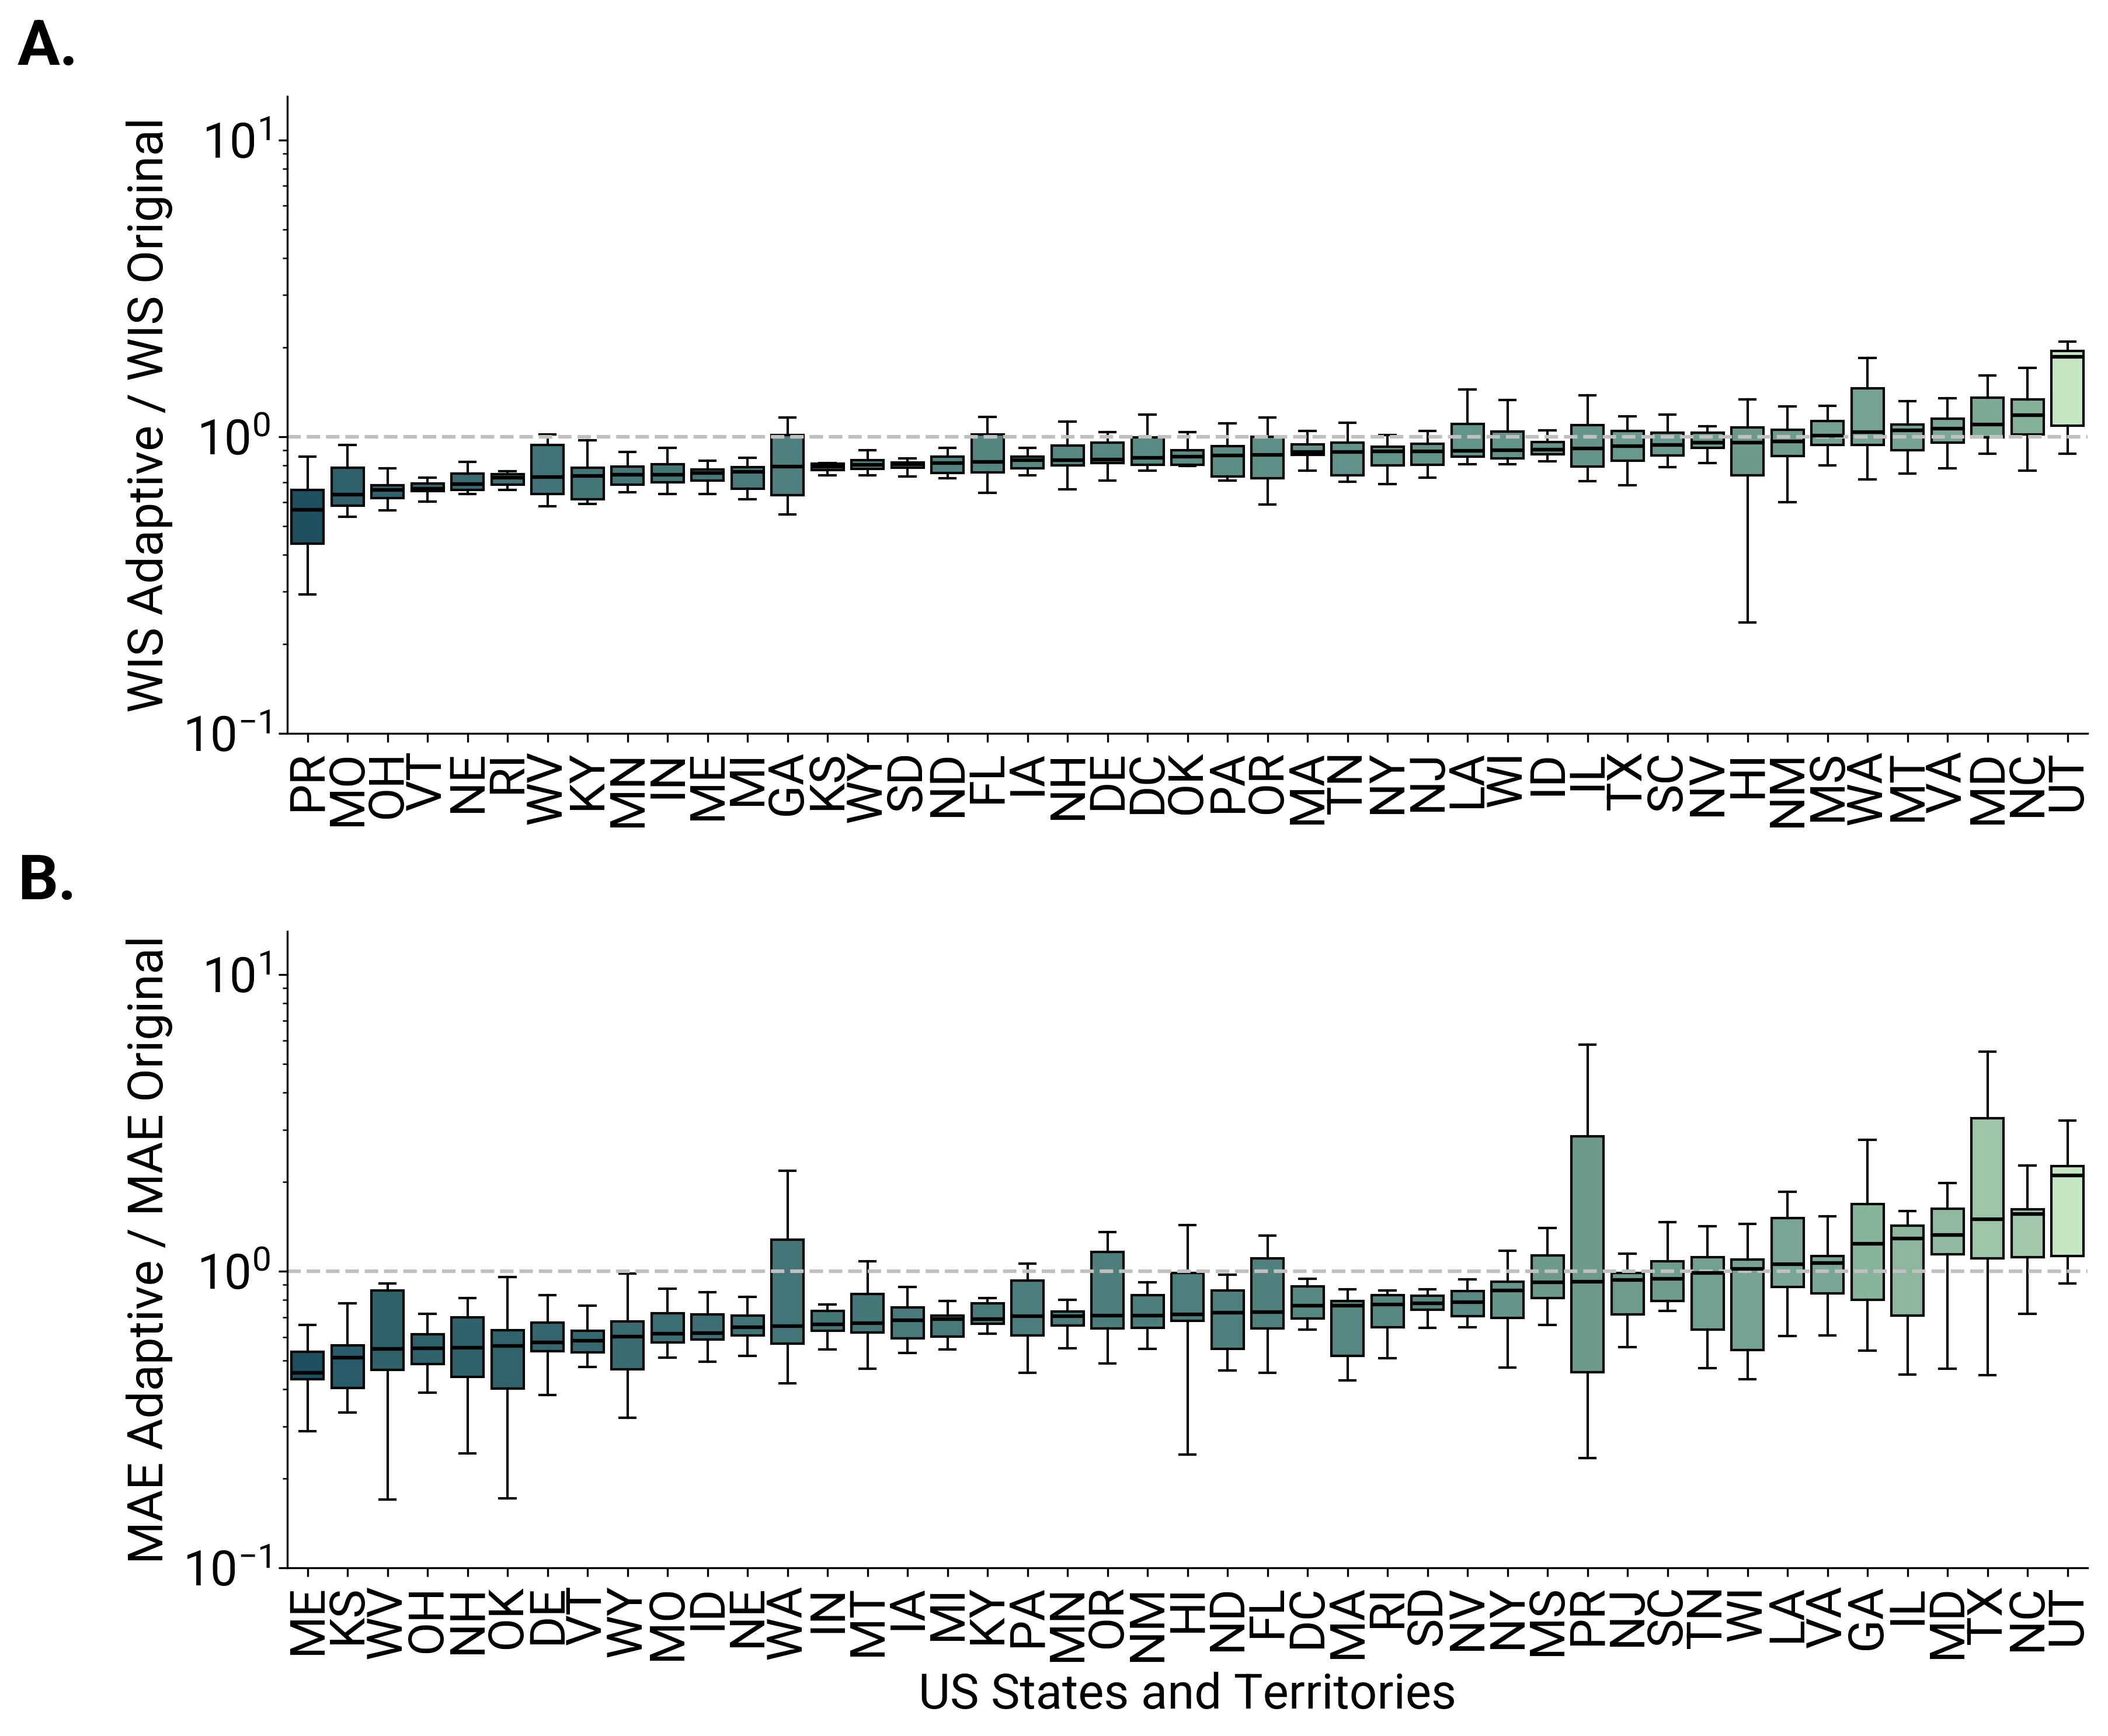

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), dpi=300)

### PLOT A: WIS Adaptive / WIS Original ###
box_wis = axes[0].boxplot(
    ordered_ratios_wis, labels=sorted_states_wis, patch_artist=True, widths=0.8, showfliers=False,
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(edgecolor='black', linewidth=1.0),
    whiskerprops=dict(color='black', linewidth=1.0),
    capprops=dict(color='black', linewidth=1.0),
)

for patch, color in zip(box_wis['boxes'], colors_wis):
    patch.set_facecolor(color)

axes[0].axhline(y=1, color='silver', linestyle='--')
axes[0].set_ylabel("WIS Adaptive / WIS Original", fontproperties=font_prop)
axes[0].text(-0.15, 1.05, 'A.', transform=axes[0].transAxes, fontproperties=font_prop_title)
axes[0].set_yscale('log')
axes[0].set_ylim(0.1, 14)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].tick_params(axis='x', rotation=90)

### PLOT B: MAE Adaptive / MAE Original ###
box_mae = axes[1].boxplot(
    ordered_ratios_mae, labels=sorted_states_mae, patch_artist=True, widths=0.8, showfliers=False,
    medianprops=dict(color='black', linewidth=1.5),
    boxprops=dict(edgecolor='black', linewidth=1.0),
    whiskerprops=dict(color='black', linewidth=1.0),
    capprops=dict(color='black', linewidth=1.0),
)

for patch, color in zip(box_mae['boxes'], colors_mae):
    patch.set_facecolor(color)

axes[1].axhline(y=1, color='silver', linestyle='--')
axes[1].set_xlabel("US States and Territories", fontproperties=font_prop)
axes[1].set_ylabel("MAE Adaptive / MAE Original", fontproperties=font_prop)
axes[1].text(-0.15, 1.05, 'B.', transform=axes[1].transAxes, fontproperties=font_prop_title)
axes[1].set_yscale('log')
axes[1].set_ylim(0.1, 14)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(axis='x', rotation=90)

# Apply custom font to tick labels
for ax in axes:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop)

plt.tight_layout()
plt.savefig("../figures/wis_mae_states_k15.png", dpi=300)

